## loading a dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784',as_frame=False)




In [2]:
X,y=mnist.data,mnist.target
print(y)

['5' '0' '4' ... '4' '5' '6']


In [3]:
print(X)
print(X.shape[1])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
784


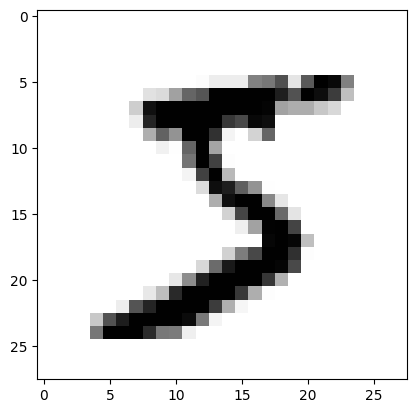

In [4]:
import matplotlib.pyplot as py
from sklearn.model_selection import cross_val_score


def data_change(image_data):
    image=image_data.reshape(28,28)
    return image

modified=data_change(X[0])
py.imshow(modified,cmap='binary')
py.show()

## test and train sets

In [5]:
import numpy as np
X_train,X_test,y_train,y_test=X[:60000,:],X[60000:,:],y[:60000],y[60000:]
y_train=y_train.astype(np.number)
y_test=y_test.astype(np.number)

C:\Users\jhans\AppData\Local\Temp\ipykernel_8592\345303272.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  y_train=y_train.astype(np.number)
C:\Users\jhans\AppData\Local\Temp\ipykernel_8592\345303272.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  y_test=y_test.astype(np.number)


In [6]:
import numpy as np
y_train_5=(y_train==5)
y_test_5=(y_test==5)
print(np.where(y_train_5==True))

(array([    0,    11,    35, ..., 59968, 59993, 59997], shape=(5421,)),)


In [7]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=42)
sgd.fit(X_train,y_train_5)
hell=sgd.predict([X[0]])
print(hell)
# cross=cross_val_score(sgd,X_train,y_train_5,cv=3,scoring='accuracy')


[ True]


In [ ]:
print(cross)

[[0.11 0.89]
 [0.99 0.01]
 [0.96 0.04]
 ...
 [0.02 0.98]
 [0.92 0.08]
 [0.94 0.06]]


: 

: 

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
def cross_validation(n):
    straw=StratifiedKFold(n_splits=3,shuffle=True)
    for train_index,test_index in straw.split(X_train,y_train_5):
        X_train_folds=X_train[train_index]
        y_train_folds=y_train[train_index]
        X_test_folds=X_train[test_index]
        y_test_folds=y_train[test_index]

        clf_sgd=clone(sgd)
        clf_sgd.fit(X_train_folds,y_train_folds)
        predict=clf_sgd.predict(X_test_folds)
        total=sum(y_test_folds==predict)
        accuracy=total/len(y_test_folds)
        print(accuracy)


: 

: 

In [ ]:
cross_validation(n=3)

0.88915


KeyboardInterrupt: 

: 

: 

In [13]:
from sklearn.dummy import DummyClassifier

dum=DummyClassifier()
dum.fit(X_train,y_train_5)
hell=dum.predict(X_train)

In [14]:
from sklearn.model_selection import cross_val_score

cross=cross_val_score(dum,X_train,y_train_5,cv=3,scoring='accuracy')

In [15]:
print(cross)

[0.90965 0.90965 0.90965]


In [17]:
from sklearn.model_selection import cross_val_predict,StratifiedKFold
skf=StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
hells=cross_val_predict(sgd,X_train,y_train_5,cv=skf)

In [18]:
hells

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [19]:
from sklearn.metrics import precision_score,recall_score

print(precision_score(y_train_5,hells))
print(recall_score(y_train_5,hells))

0.6976518218623482
0.7946873270614278


In [20]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_train_5,hells)

In [21]:
cm

array([[52712,  1867],
       [ 1113,  4308]])

In [22]:
from sklearn.model_selection import cross_val_predict,StratifiedKFold
skf=StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
hell=cross_val_predict(sgd,X_train,y_train_5,cv=skf,method='decision_function')
print(hell[1653])

-20041.000960176752


In [23]:
hell[0]

np.float64(1067.0144273423803)

In [24]:
from sklearn.metrics import precision_recall_curve

precision,reacall,thresholds=precision_recall_curve(y_train_5,hell)
print(thresholds.shape)
print(precision.shape)
print(precision[1653])

(60000,)
(60001,)
0.09277255043104186


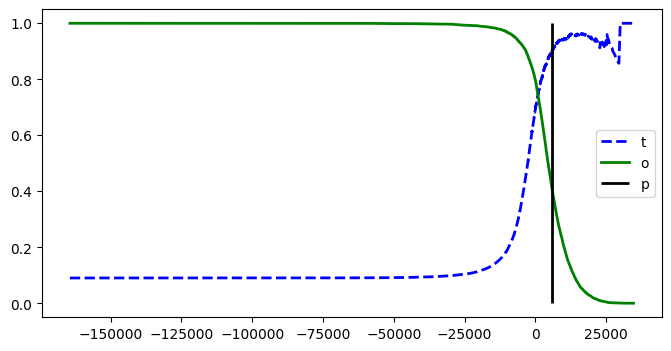

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(thresholds,precision[:-1],'b--',label='precision',linewidth=2)
plt.plot(thresholds,reacall[:-1],'g-',label='precision',linewidth=2)
plt.vlines(thresholds[57489],0,1,'k'
           ,label='precision',linewidth=2)
plt.legend('topright')
plt.show()


In [26]:
idx_for_90_precision = (precision >= 0.90).argmax()
print(precision.shape)
print(np.where(precision==0.90))
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision


(60001,)
(array([57490, 59990]),)


np.float64(5709.912082040445)

In [27]:
from sklearn.metrics import precision_score,recall_score

self_predict=(hell >= threshold_for_90_precision)
print(self_predict)
print(np.sum(self_predict==True))
print(self_predict.shape)
print(precision_score(y_train_5,self_predict))
recall_score(y_train_5,self_predict)

[False False False ...  True False False]
2512
(60000,)
0.9000796178343949


0.4170817192399926

In [28]:
# print(np.where(y_train_5[300:5000]==1))
# print(y_train_5.shape)
print(thresholds.shape)


(60000,)


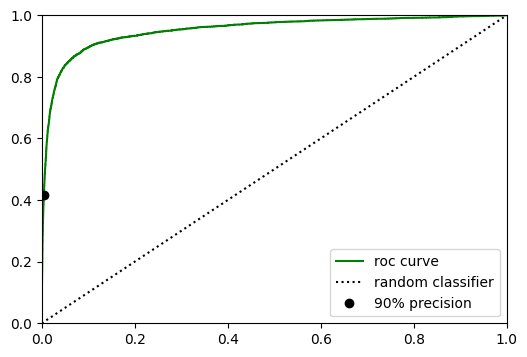

In [29]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_train_5,hell)
threshold_index=(thresholds<=threshold_for_90_precision).argmax()
fpr_90,tpr_90=tpr[threshold_index],fpr[threshold_index]
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'g-',label='roc curve')
plt.plot([0,1],[0,1],'k:',label='random classifier')
plt.plot([tpr_90],[fpr_90],'ko',label='90% precision')
plt.axis([0,1,0,1])
plt.legend()

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,hell)

0.9520055579026794

In [31]:
from sklearn.ensemble import RandomForestClassifier
random=RandomForestClassifier(random_state=42)

In [32]:
from sklearn.model_selection import cross_val_predict
cross=cross_val_predict(random,X_train,y_train_5,cv=3,method='predict_proba')

In [33]:
print(cross)

[[0.11 0.89]
 [0.99 0.01]
 [0.96 0.04]
 ...
 [0.02 0.98]
 [0.92 0.08]
 [0.94 0.06]]


In [34]:
from sklearn.metrics import precision_score,recall_score,precision_recall_curve

precision_forest,recall_forest,thresholds_forest=precision_recall_curve(y_train_5,cross[:,1])

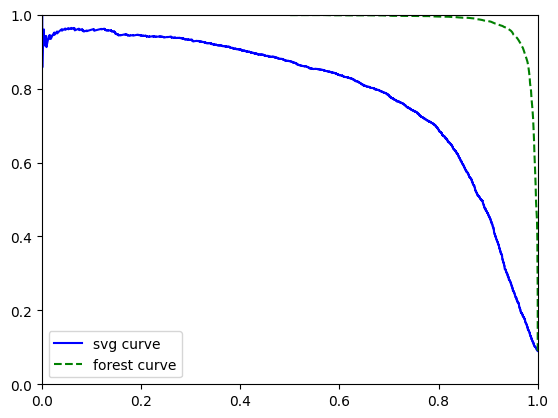

In [35]:
plt.plot(reacall,precision,'b-',label='svg curve')
plt.plot(recall_forest,precision_forest,'g--',label='forest curve')
plt.axis([0,1,0,1])
plt.legend()
plt.show()

In [7]:
from sklearn.svm import SVC

multi_classifier=SVC(random_state=42)
multi_classifier.fit(X_train[:2000,:],y_train[:2000])
pred=multi_classifier.predict([X_train[50000]])
print(y_train.shape)


(60000,)


In [37]:
print(pred,y_train[50000])

[3.] 3.0


In [38]:
np.argmax(multi_classifier.decision_function([X_train[50000]]))

np.int64(3)

In [39]:
multi_classifier.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

## ovr and ovo classifiers class

In [8]:
from sklearn.multiclass import OneVsRestClassifier
ovr=OneVsRestClassifier(SVC(random_state=42))
ovr.fit(X_train[:2000],y_train[:2000])
ovr.predict([X_train[50000]])

array([3.])

In [41]:
w=np.argmax(ovr.decision_function([X_train[50000]]))
print(w)
ovr.estimators_

3


[SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42)]

In [10]:
from sklearn.linear_model import SGDClassifier
prac=SGDClassifier()
prac.fit(X_train,y_train)
prac.predict([X_train[50000]])

array([3.])

In [ ]:

prac.predict([X_train[5000]])
print(y_train[5000])

array([7.])

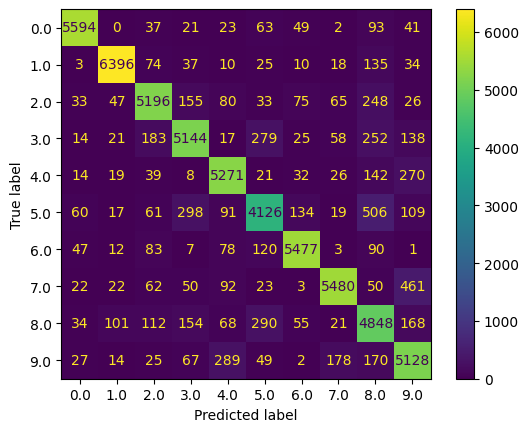

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict
ovr_predict=cross_val_predict(prac,X_train,y_train,cv=3)
ConfusionMatrixDisplay.from_predictions(y_train,ovr_predict)

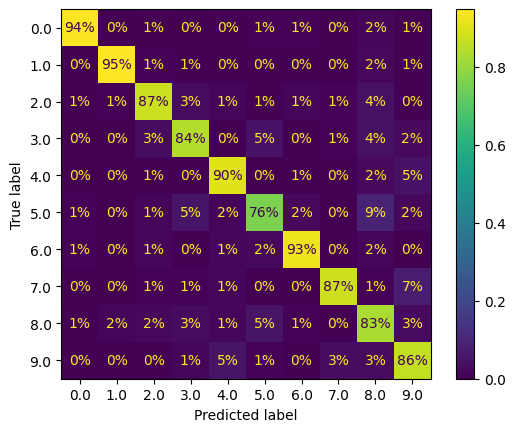

In [20]:
ConfusionMatrixDisplay.from_predictions(y_train,ovr_predict,normalize='true',values_format='.0%')

[False False False ... False False False]


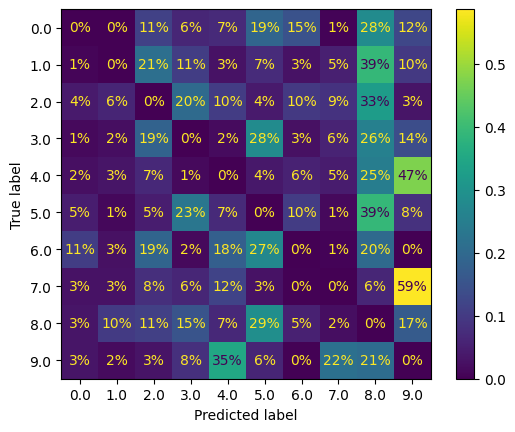

In [23]:
no_weights=(y_train!=ovr_predict)
ConfusionMatrixDisplay.from_predictions(y_train,ovr_predict,sample_weight=no_weights,normalize='true',values_format='.0%')
print(no_weights)

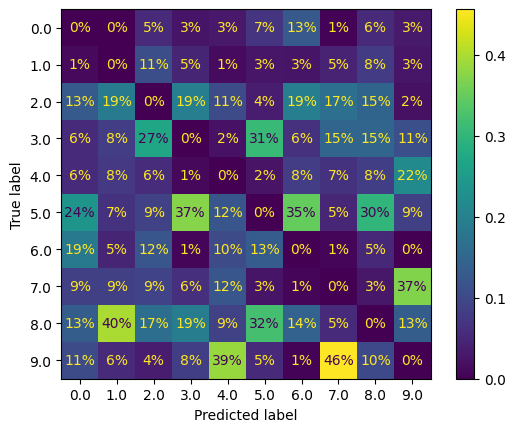

In [24]:
ConfusionMatrixDisplay.from_predictions(y_train,ovr_predict,sample_weight=no_weights,normalize='pred',values_format='.0%')

In [29]:
from sklearn.neighbors import KNeighborsClassifier
large=(y_train>=7)
even=(y_train.astype('int8')%2==0)
knn_arr=np.c_[large,even]
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,knn_arr)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [33]:
knn_prec=knn_model.predict([X_train[5000]])
print(knn_prec)

[[ True False]]


In [34]:
from sklearn.metrics import f1_score
knn_cv=cross_val_predict(knn_model,X_train,knn_arr,cv=3)
f1_score(knn_cv,knn_arr,average='weighted')

0.9771423416313858

In [38]:
from sklearn.multioutput import ClassifierChain
chain=ClassifierChain(SVC(),cv=3,random_state=42)
chain.fit(X_train[:2000],knn_arr[:2000])

,estimator,SVC()
,order,None
,cv,3
,chain_method,'predict'
,random_state,42
,verbose,False
,base_estimator,'deprecated'
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


In [41]:
chain.predict([X_train[5000]])

array([[1., 0.]])

here i am using multiotput classisfication by adding noice to the data

In [44]:
X_train_noise=np.random.randint(0,100,(len(X_train),784))
X_test_noise=np.random.randint(0,100,(len(X_test),784))
X_train_mod=X_train+X_train_noise
X_test_mod=X_test+X_test_noise

In [45]:
y_train_mod=X_train
y_test_mod=X_test

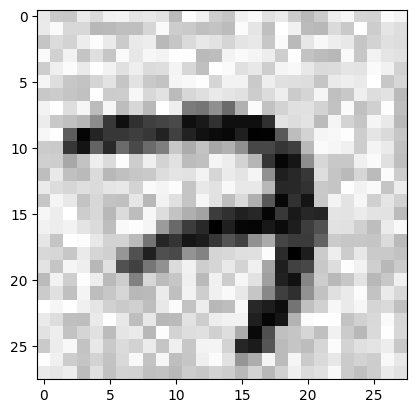

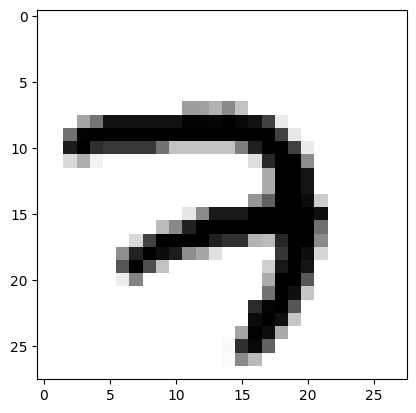

In [52]:
import matplotlib.pyplot as plt
img=X_train_mod[5000].reshape(28,28)
img1=y_train_mod[5000].reshape(28,28)
plt.imshow(img,cmap='binary')
plt.show()
plt.imshow(img1,cmap='binary')
plt.show()

In [62]:
classify=KNeighborsClassifier(n_neighbors=1)
classify.fit(X_train_mod,y_train_mod)
pred_val=classify.predict([X_test_mod[9999]])


In [1]:
vg=0
while vg<10:
    print(vg)
    vg=vg+1

0
1
2
3
4
5
6
7
8
9


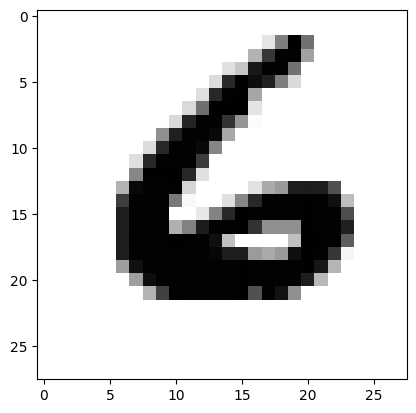

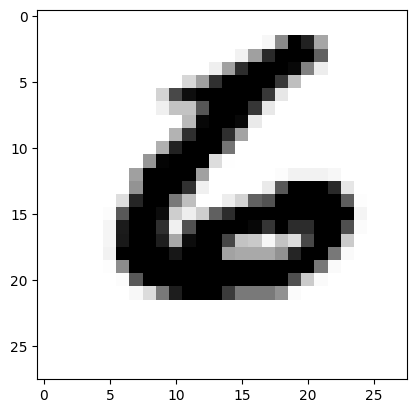

In [61]:
img2=pred_val.reshape(28,28)
plt.imshow(img2,cmap='binary')
plt.show()
img2=y_test_mod[9999].reshape(28,28)
plt.imshow(img2,cmap='binary')
plt.show()